# Homework ada7

### TMI M1 37-176839 Koichiro Tamura

### homework1

$$(\mathbf{\hat{\mu}}, \mathbf{\hat{\Sigma}}) = arg\min _{ \mathbf{\mu}, \mathbf{\Sigma} }{ J(\mathbf{\mu}, \mathbf{\Sigma}) } $$

$$J(\mathbf{\mu}, \mathbf{\Sigma})  = (\max{ (0, 1-\mathbf{\mu}^T \phi(\mathbf{x})y }))^2 + \phi(\mathbf{x})^T\mathbf{\Sigma}\phi(\mathbf{x}) + \gamma \left\{ log{\frac{det(\tilde{\Sigma})}{det(\Sigma)}} + tr(\tilde{\mathbf{\Sigma}}^{-1}\mathbf{\Sigma}) + (\mu - \tilde{\mu})^T \tilde{\Sigma}^{-1} (\mu - \tilde{\mu}) - d  \right\}$$

2乗ヒンジ損失に対する適応正則化分類の$\mu$の解は，次式で表せることを示せ
$$\hat{\mathbf{\mu}} = \tilde{\mathbf{\mu}} + \frac{ y\max{(0, 1- \tilde{\mathbf{\mu}}^T} \phi(\mathbf{x}) y) }{  \phi(\mathbf{x})^T\tilde{\mathbf{\Sigma}}\phi(\mathbf{x}) + \gamma} \tilde{\mathbf{\Sigma}}\phi(\mathbf{x})$$

#### proof:

$\mathbf{\mu}^T \phi(\mathbf{x}) = \phi(\mathbf{x})^Y \mathbf{\mu}$より，

$$J(\mathbf{\mu}, \mathbf{\Sigma})  = (\max{ (0, 1-\phi(\mathbf{x})^T \mathbf{\mu}  y }))^2 + \phi(\mathbf{x})^T\mathbf{\Sigma}\phi(\mathbf{x}) + \gamma \left\{ log{\frac{det(\tilde{\Sigma})}{det(\Sigma)}} + tr(\tilde{\mathbf{\Sigma}}^{-1}\mathbf{\Sigma}) + (\tilde{\Sigma}^{-1})^T (\mu - \tilde{\mu})^2 - d  \right\}$$


$\max{(0, 1- \tilde{\mathbf{\mu}}^T} \phi(\mathbf{x}) y)  = (1- \tilde{\mathbf{\mu}}^T \phi(\mathbf{x}) y)$とすると，

$$\frac{\partial J(\mathbf{\mu}, \mathbf{\sigma} )  }{ \partial \mu } = 0$$

及び逆行列の公式より,  

$$\hat{\mathbf{\mu}} = \tilde{\mathbf{\mu}} + \frac{ y(1- \tilde{\mathbf{\mu}}^T \phi(\mathbf{x}) y) }{  \phi(\mathbf{x})^T\tilde{\mathbf{\Sigma}}\phi(\mathbf{x}) + \gamma} \tilde{\mathbf{\Sigma}}\phi(\mathbf{x})$$

また，  $\max{(0, 1- \tilde{\mathbf{\mu}}^T} \phi(\mathbf{x}) y)  = 0$の時，$\hat \mu = \tilde \mu$なので，

$$\hat{\mathbf{\mu}} = \tilde{\mathbf{\mu}} + \frac{ y\max{(0, 1- \tilde{\mathbf{\mu}}^T} \phi(\mathbf{x}) y) }{  \phi(\mathbf{x})^T\tilde{\mathbf{\Sigma}}\phi(\mathbf{x}) + \gamma} \tilde{\mathbf{\Sigma}}\phi(\mathbf{x})$$



<div style="text-align: right;">
【Q.E.D】
</div>

### homework2

二乗ヒンジ損失に基づく適応正則化分類を線形モデル
$$f_{\theta}(\mathbf{x}) = f_{\theta}(x^{(1)}, x^{(2)}) = (x^{(1)}  x^{(2)} 1 ) \mathbf{\theta}$$
に対して実装せよ

### 参考: https://openbook4.me/projects/233/sections/1477

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from numpy.random import rand, multivariate_normal
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from numpy import dot   #np.dotはめんどくさいのでdotでつかえるようにする

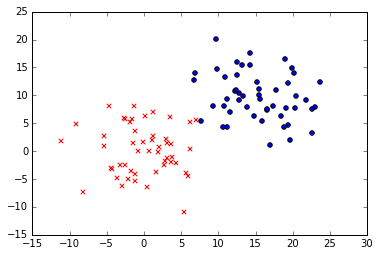

In [4]:
N1 = 50         #  t=+1 のデータ数
Mu1 = [15,10]   #  t=+1 の中心座標    　　Muはμ
 
N2 = 50         #  t=-1 のデータ数
Mu2 = [0,0]     #  t=-1 の中心座標
 
variance = 20
 
# データセット を用意
cov1 = np.array([[variance,0],[0,variance]])   #分散共分散行列
cov2 = np.array([[variance,0],[0,variance]])
 
df1 = DataFrame(multivariate_normal(Mu1,cov1,N1),columns=['x','y'])
df1['type'] = 1
df2 = DataFrame(multivariate_normal(Mu2,cov2,N2),columns=['x','y'])
df2['type'] = -1
df = pd.concat([df1,df2],ignore_index=True) #縦に結合
 
plt.scatter(df1["x"],df1["y"], c='blue', marker='o')
plt.scatter(df2["x"],df2["y"], c='red', marker='x')
 
plt.show()

In [6]:
df = shuffle(df).reset_index().drop("index", axis = 1)    #dfをシャッフル
t = df["type"]
data = df[["x", "y"]]
phi = data
phi["bias"] = 1

In [7]:
#初期値
theta = np.random.normal(loc=0, scale=0.1, size=3)
sigma = np.random.normal(loc=0, scale=0.1, size=(3,3))

In [12]:
for i in range(100):    #データ点すべてを使う
    tmp = dot(phi.ix[i][:, np.newaxis], phi.ix[i][:, np.newaxis].T)
    gamma = 0.0001   
    beta = dot(dot(phi.ix[i][:, np.newaxis].T,  sigma) , phi.ix[i][:, np.newaxis])  + gamma
    sigma = sigma - dot(dot(sigma, tmp), sigma) / beta   #シグマ更新
    theta = theta + t[i] * np.max(1 - dot(theta[:, np.newaxis].T, phi.ix[i]) * t[i], 0) * dot(sigma, phi.ix[i]) / beta  #ミュー更新
    theta = theta.flatten()
    # print(theta)

In [10]:
def f(x):    #モデル関数
    y = - theta[0] /theta[1] * x - theta[2] / theta[1]
    return y

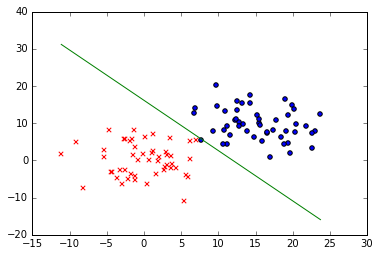

In [11]:
plt.scatter(df1["x"],df1["y"], c='blue', marker='o')
plt.scatter(df2["x"],df2["y"], c='red', marker='x')
linex = np.arange(df["x"].min(),df["x"].max(),0.01)
liney = f(linex)                                    #求めたfを使って直線をかく
plt.plot(linex, liney, color='green')
plt.show()